<a href="https://colab.research.google.com/github/Gagankhandelwal01/ml/blob/main/Day_25_FsNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('/content/wine_data.csv', header = None, usecols=[0,1,2])
df.columns= ['Class label', 'Alcohol', 'Malic acid']


In [39]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<ipython-input-40-a3065fab06fe>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Alcohol'], shade = True)


<Axes: xlabel='Alcohol', ylabel='Density'>

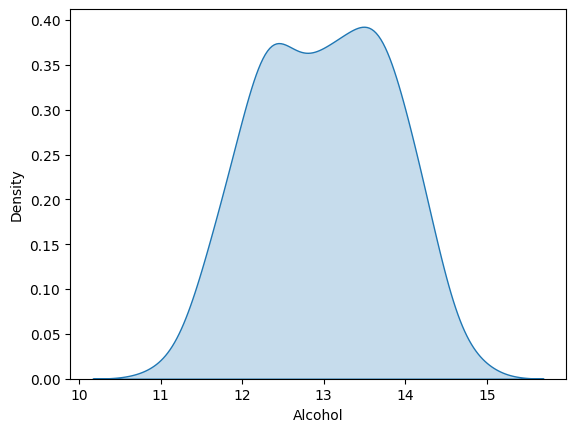

In [40]:
sns.kdeplot(df['Alcohol'], shade = True)

<ipython-input-41-1968417e29bb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Malic acid'], shade = True)


<Axes: xlabel='Malic acid', ylabel='Density'>

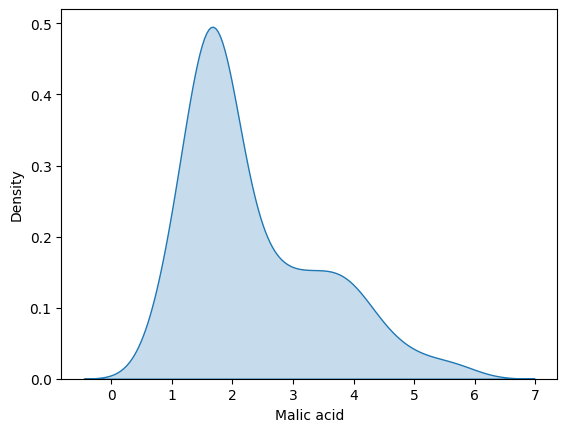

In [41]:
sns.kdeplot(df['Malic acid'], shade = True)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

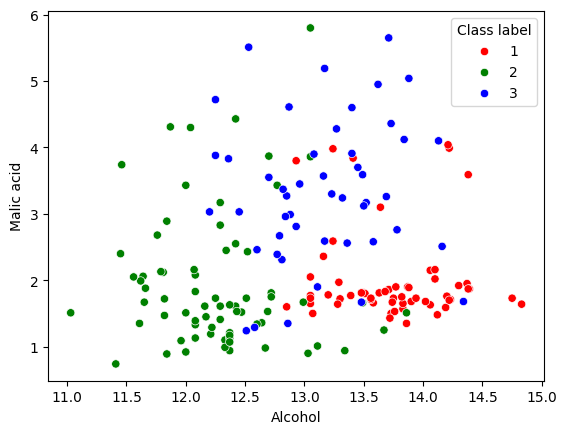

In [42]:
color = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Alcohol', 'Malic acid']], df['Class label'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Fit the Scaler to train set, it will learn parameters
scaler.fit(X_train)

#Transform train And Test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [47]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

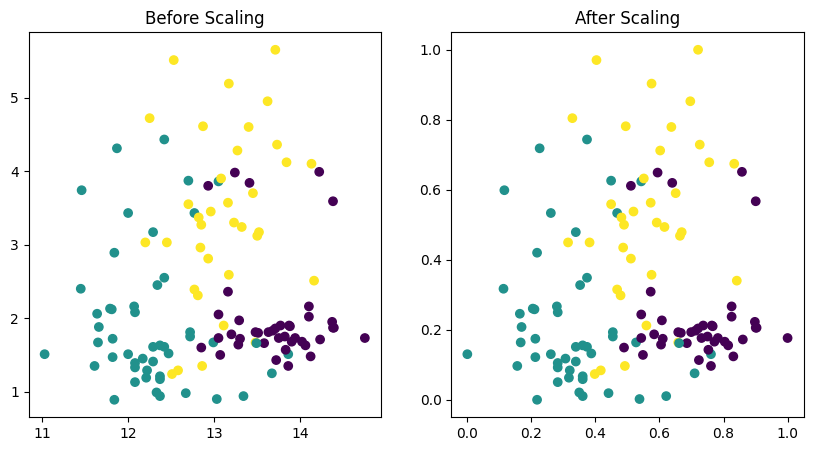

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
axes[0].set_title('Before Scaling')

axes[1].scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
axes[1].set_title('After Scaling')

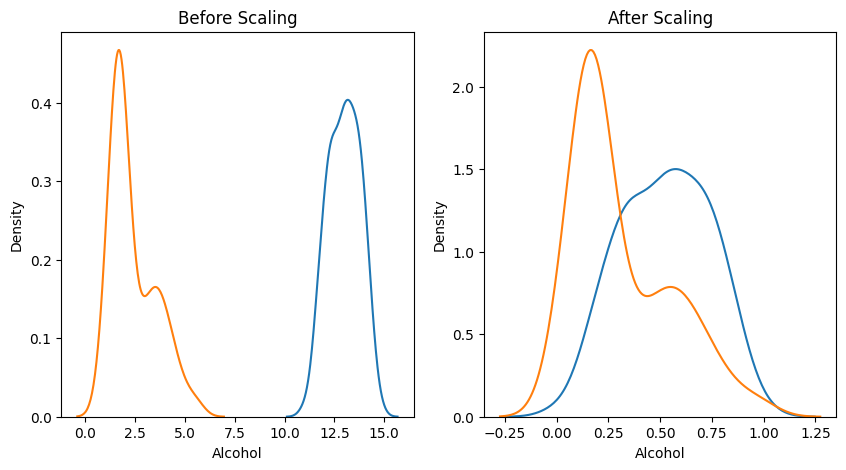

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=axes[0])
sns.kdeplot(X_train['Malic acid'], ax=axes[0])


axes[1].set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=axes[1])
sns.kdeplot(X_train_scaled['Malic acid'], ax=axes[1])
plt.show()